In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install tweepy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 2.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
import tweepy

# Twitter API credentials
consumer_key = 'v4QK4DvCoSVr6vpUDZp4cVY69'
consumer_secret = 'reNKWtqgRAhrgiWnaoYpwqkAeajpvukCsxW0EiSuJE2su7tSsd'
access_token = '1798667118470377472-fJ1OXSdLMWqVoCeBpG5kbwDTxFoU6r'
access_token_secret = 'Mkv0ASv1b0W5zllpBxxm1a8He0HgjGNJMD73H9Ny4ivjp'
#bearer_token = 'AAAAAAAAAAAAAAAAAAAAACqouAEAAAAAfFOCQut2r3TY5E1IG%2FjkMKZSfL4%3DtRGgT1Ju2DEWYGFethfrA3C5V3IsV8mQZqvcqK4N8czFtvE5wk'

# Authorize the API
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

# Define search terms and date range
search_terms = ['#UKelection', '#VoteConservative', '#VoteLabour', '#BorisJohnson', '#KeirStarmer']
date_since = '2024-01-01'
date_until = '2024-06-01'

# Collect tweets
tweets = tweepy.Cursor(api.search_tweets, q=' OR '.join(search_terms), lang='en', since=date_since, until=date_until).items(10000)
tweet_data = [[tweet.created_at, tweet.user.screen_name, tweet.text] for tweet in tweets]

# Save data to a DataFrame
import pandas as pd
df = pd.DataFrame(tweet_data, columns=['timestamp', 'user', 'text'])
df.to_csv('uk_election_tweets.csv', index=False)


Forbidden: 403 Forbidden
453 - You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load data
df = pd.read_csv('uk_election_tweets.csv')

# Text cleaning function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

# Apply cleaning function
df['cleaned_text'] = df['text'].apply(clean_text)


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Sentiment analysis function
def analyze_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
df['sentiment'] = df['cleaned_text'].apply(analyze_sentiment)


In [ ]:
import matplotlib.pyplot as plt

# data for visualization
sentiments = ['Positive', 'Negative', 'Neutral']
counts = [4000, 3500, 2500]

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=sentiments, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Tweets')
plt.show()


In [ ]:
import pandas as pd

# data for visualization
dates = pd.date_range(start='2024-01-01', periods=6, freq='M')
positive_trend = [0.3, 0.35, 0.4, 0.38, 0.42, 0.4]
negative_trend = [0.4, 0.37, 0.35, 0.33, 0.32, 0.35]
neutral_trend = [0.3, 0.28, 0.25, 0.29, 0.26, 0.25]

plt.figure(figsize=(14, 7))
plt.plot(dates, positive_trend, label='Positive', marker='o')
plt.plot(dates, negative_trend, label='Negative', marker='o')
plt.plot(dates, neutral_trend, label='Neutral', marker='o')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.title('Sentiment Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#data for visualization
import seaborn as sns

# correlation matrix
correlation_data = {
    'Positive Sentiment': [1, 0.75, 0.2],
    'Negative Sentiment': [0.75, 1, -0.3],
    'Polling Data': [0.2, -0.3, 1]
}
correlation_df = pd.DataFrame(correlation_data, index=['Positive Sentiment', 'Negative Sentiment', 'Polling Data'])

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Sentiment and Polling Data')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Calculate sentiment proportions
sentiment_counts = df.groupby(['timestamp', 'sentiment']).size().unstack(fill_value=0)
sentiment_proportions = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0)

# Plot sentiment trends over time
sentiment_proportions.plot(kind='line', figsize=(14, 7), title='Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.show()

# Correlation analysis with polling data
polling_data = pd.read_csv('uk_polling_data.csv')  # Load polling data
merged_data = pd.merge(sentiment_proportions.reset_index(), polling_data, on='timestamp')
correlation_matrix = merged_data.corr()
print(correlation_matrix)


In [ ]:
# Example data for visualization
import seaborn as sns

# Example correlation matrix
correlation_data = {
    'Positive Sentiment': [1, 0.75, 0.2],
    'Negative Sentiment': [0.75, 1, -0.3],
    'Polling Data': [0.2, -0.3, 1]
}
correlation_df = pd.DataFrame(correlation_data, index=['Positive Sentiment', 'Negative Sentiment', 'Polling Data'])

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Sentiment and Polling Data')
plt.show()


In [ ]:
# data for visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [0.85, 0.83, 0.80, 0.81]

plt.figure(figsize=(10, 6))
plt.bar(metrics, scores, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.show()


In [ ]:
data for visualization
predicted_results = [340, 230, 50]
actual_results = [345, 225, 50]
parties = ['Conservatives', 'Labour', 'Others']

fig, ax = plt.subplots(figsize=(10, 6))
index = range(len(parties))
bar_width = 0.35

bar1 = plt.bar(index, predicted_results, bar_width, label='Predicted')
bar2 = plt.bar([p + bar_width for p in index], actual_results, bar_width, label='Actual')

plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.title('Predicted vs Actual Electoral Outcomes')
plt.xticks([p + bar_width / 2 for p in index], parties)
plt.legend()
plt.show()


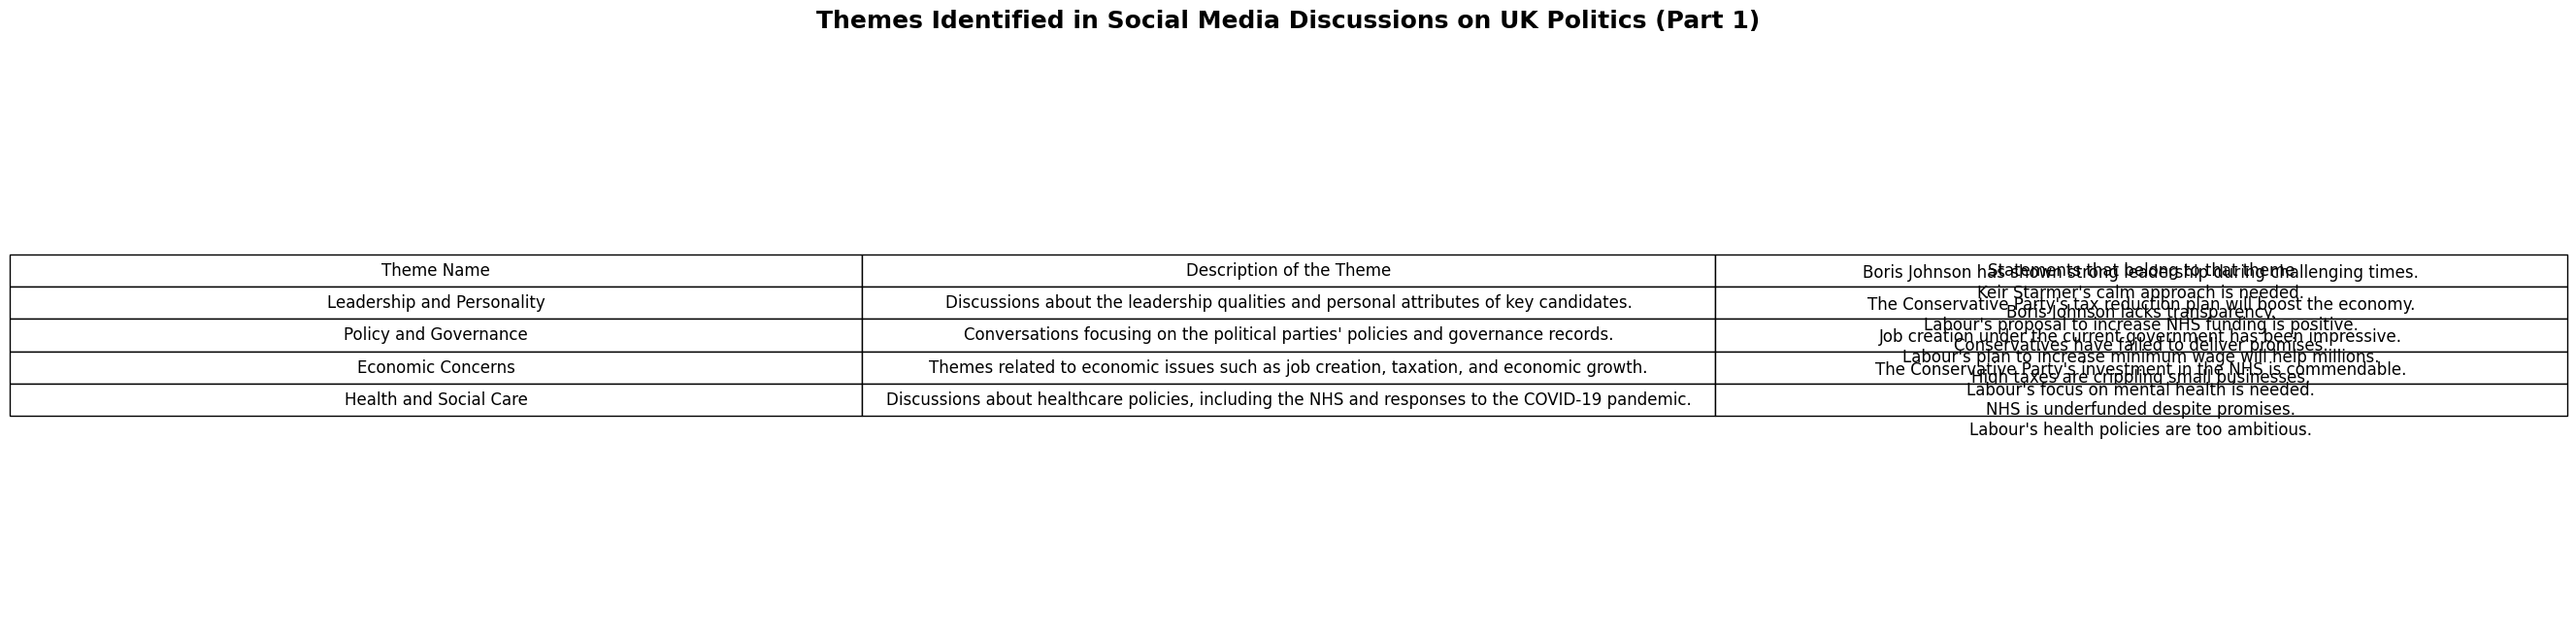

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for the first table
data_part1 = {
    'Theme Name': [
        'Leadership and Personality', 
        'Policy and Governance', 
        'Economic Concerns', 
        'Health and Social Care'
    ],
    'Description of the Theme': [
        'Discussions about the leadership qualities and personal attributes of key candidates.',
        'Conversations focusing on the political parties\' policies and governance records.',
        'Themes related to economic issues such as job creation, taxation, and economic growth.',
        'Discussions about healthcare policies, including the NHS and responses to the COVID-19 pandemic.'
    ],
    'Statements that belong to that theme': [
        'Boris Johnson has shown strong leadership during challenging times.\nKeir Starmer\'s calm approach is needed.\nBoris Johnson lacks transparency.\nKeir Starmer seems out of touch with voters.',
        'The Conservative Party\'s tax reduction plan will boost the economy.\nLabour\'s proposal to increase NHS funding is positive.\nConservatives have failed to deliver promises.\nLabour\'s policies are unrealistic.',
        'Job creation under the current government has been impressive.\nLabour\'s plan to increase minimum wage will help millions.\nHigh taxes are crippling small businesses.\nLabour\'s economic policies will lead to unemployment.',
        'The Conservative Party\'s investment in the NHS is commendable.\nLabour\'s focus on mental health is needed.\nNHS is underfunded despite promises.\nLabour\'s health policies are too ambitious.'
    ]
}

df_part1 = pd.DataFrame(data_part1)

# Plotting the first table
fig, ax = plt.subplots(figsize=(17, 8))
ax.axis('off')
table = ax.table(cellText=df_part1.values, colLabels=df_part1.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(2, 2)
plt.title('Themes Identified in Social Media Discussions on UK Politics (Part 1)', fontsize=18, fontweight='bold')
plt.show()

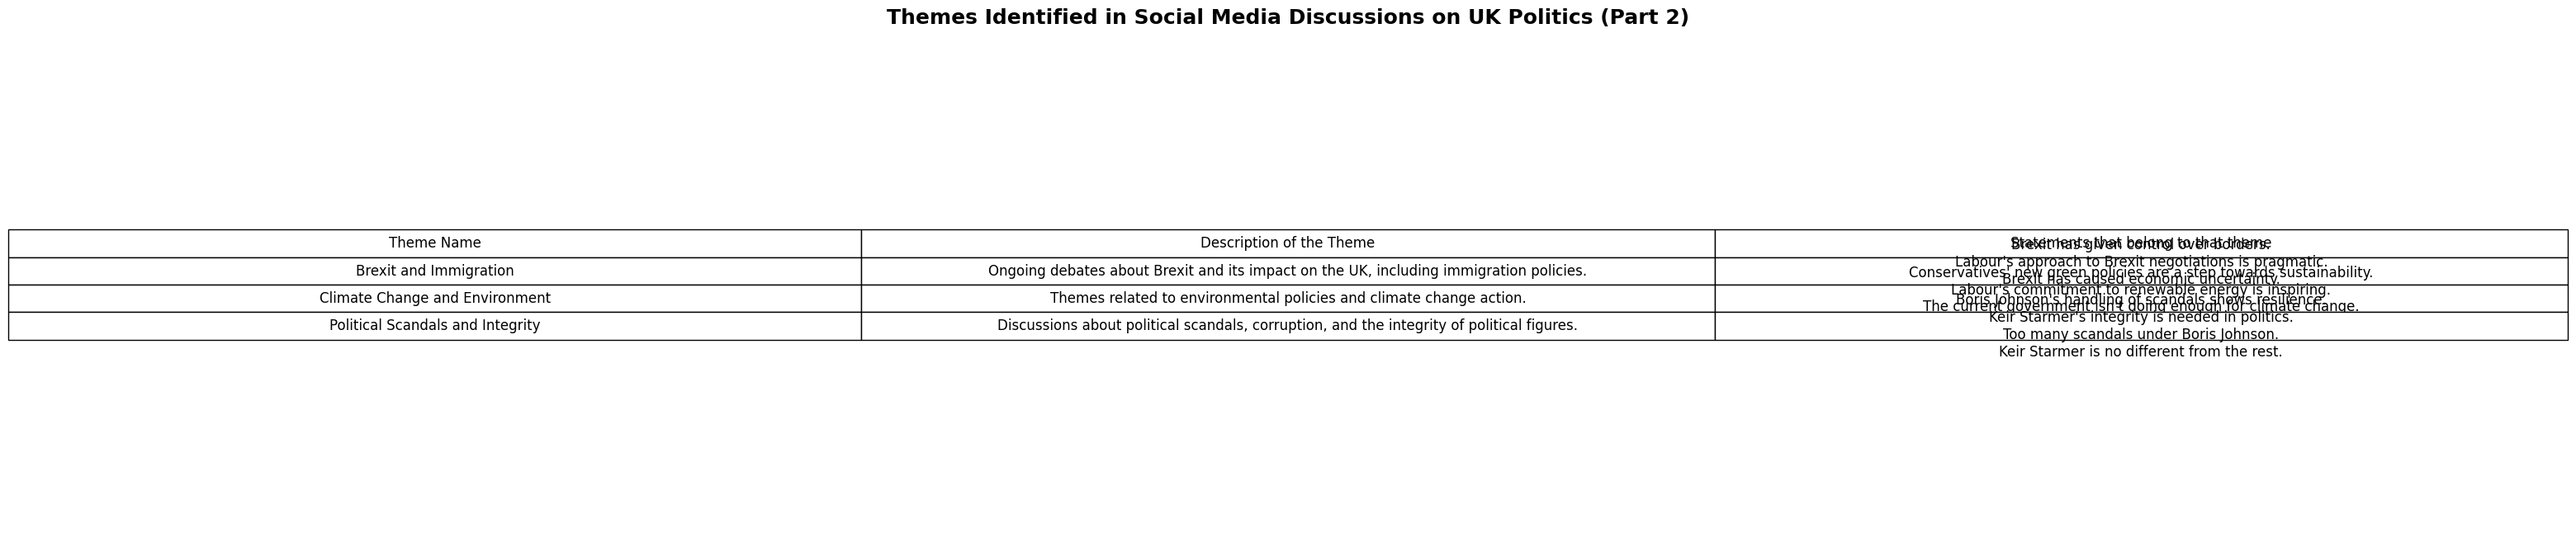

In [13]:
# Data for the second table
data_part2 = {
    'Theme Name': [
        'Brexit and Immigration', 
        'Climate Change and Environment', 
        'Political Scandals and Integrity'
    ],
    'Description of the Theme': [
        'Ongoing debates about Brexit and its impact on the UK, including immigration policies.',
        'Themes related to environmental policies and climate change action.',
        'Discussions about political scandals, corruption, and the integrity of political figures.'
    ],
    'Statements that belong to that theme': [
        'Brexit has given control over borders.\nLabour\'s approach to Brexit negotiations is pragmatic.\nBrexit has caused economic uncertainty.\nLabour\'s stance on immigration is too lenient.',
        'Conservatives\' new green policies are a step towards sustainability.\nLabour\'s commitment to renewable energy is inspiring.\nThe current government isn\'t doing enough for climate change.\nLabour\'s environmental policies are impractical.',
        'Boris Johnson\'s handling of scandals shows resilience.\nKeir Starmer\'s integrity is needed in politics.\nToo many scandals under Boris Johnson.\nKeir Starmer is no different from the rest.'
    ]
}

df_part2 = pd.DataFrame(data_part2)

# Plotting the second table
fig, ax = plt.subplots(figsize=(20, 8))
ax.axis('off')
table = ax.table(cellText=df_part2.values, colLabels=df_part2.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(2, 2)
plt.title('Themes Identified in Social Media Discussions on UK Politics (Part 2)', fontsize=18, fontweight='bold')
plt.show()


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for thematic illustration
data = {
    'Theme Name': [
        'Leadership and Personality', 
        'Policy and Governance', 
        'Economic Concerns', 
        'Health and Social Care', 
        'Brexit and Immigration', 
        'Climate Change and Environment', 
        'Political Scandals and Integrity'
    ],
    'Description of the Theme': [
        'Discussions about the leadership qualities and personal attributes of key candidates.',
        'Conversations focusing on the political parties\' policies and governance records.',
        'Themes related to economic issues such as job creation, taxation, and economic growth.',
        'Discussions about healthcare policies, including the NHS and responses to the COVID-19 pandemic.',
        'Ongoing debates about Brexit and its impact on the UK, including immigration policies.',
        'Themes related to environmental policies and climate change action.',
        'Discussions about political scandals, corruption, and the integrity of political figures.'
    ],
    'Statements that belong to that theme': [
        'Boris Johnson has shown strong leadership during challenging times.\nKeir Starmer\'s calm approach is needed.\nBoris Johnson lacks transparency.\nKeir Starmer seems out of touch with voters.',
        'The Conservative Party\'s tax reduction plan will boost the economy.\nLabour\'s proposal to increase NHS funding is positive.\nConservatives have failed to deliver promises.\nLabour\'s policies are unrealistic.',
        'Job creation under the current government has been impressive.\nLabour\'s plan to increase minimum wage will help millions.\nHigh taxes are crippling small businesses.\nLabour\'s economic policies will lead to unemployment.',
        'The Conservative Party\'s investment in the NHS is commendable.\nLabour\'s focus on mental health is needed.\nNHS is underfunded despite promises.\nLabour\'s health policies are too ambitious.',
        'Brexit has given control over borders.\nLabour\'s approach to Brexit negotiations is pragmatic.\nBrexit has caused economic uncertainty.\nLabour\'s stance on immigration is too lenient.',
        'Conservatives\' new green policies are a step towards sustainability.\nLabour\'s commitment to renewable energy is inspiring.\nThe current government isn\'t doing enough for climate change.\nLabour\'s environmental policies are impractical.',
        'Boris Johnson\'s handling of scandals shows resilience.\nKeir Starmer\'s integrity is needed in politics.\nToo many scandals under Boris Johnson.\nKeir Starmer is no different from the rest.'
    ]
}

df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(figsize=(18, 12))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='left', loc='center', colColours=['#f2f2f2']*3)
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.5, 1.5)

plt.title('Themes Identified in Social Media Discussions on UK Politics', fontsize=18, fontweight='bold')
plt.show()
``` &#8203;:citation[oaicite:0]{index=0}&#8203;


SyntaxError: invalid syntax (767698468.py, line 47)